In [1]:
%reload_ext autoreload
%autoreload 2


In [2]:
import torch
import matplotlib.pyplot as plt
from estimators.data import TraversabilityDataset, get_transform
from estimators.data.TraversabilityDataset import PatchesDataset
from estimators.utils import get_learner
from utilities.postprocessing.utils import KrockPatchExtractStrategy
from utilities.patches import *
from interpretability import *
from jupyterthemes import jtplot
from estimators.utils import load_model_from_name
import matplotlib
jtplot.reset()

/home/francesco/.local/lib/python3.6/site-packages/skimage/novice/__init__.py:103: UserWarning: The `skimage.novice` module was deprecated in version 0.14. It will be removed in 0.16.
  warnings.warn("The `skimage.novice` module was deprecated in version 0.14. "


In [3]:
plt.style.use(['science'])
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""
# %matplotlib notebook
matplotlib.rcParams['figure.figsize'] = (7,5)


In [8]:
model_name = 'microresnet#4-gate=3x3-n=1-se=True'
model_dir = '/media/francesco/Carino/vaevictis/data/microresnet#4-gate=3x3-n=1-se=True--0.001-0.66-1557073626.4222503'
BASE_DIR = '/media/francesco/saetta/krock-dataset/test/'
TEST_META = BASE_DIR + '/bags/meta.csv'
HM_DIR = '/media/francesco/saetta/krock-dataset/test/csvs_patches'
PATCHES_DIR = '/media/francesco/saetta/krock-dataset/test/patches/0.66/'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
module = load_model_from_name(model_dir + '/roc_auc.pth', model_name )
module = module.eval()

In [87]:
ds = TraversabilityDataset.from_root(HM_DIR, patches_dir = PATCHES_DIR, time_window = 50*2, patch_size=0.66, tr=0.2, transform=get_transform(debug=False))
learner, _ = get_learner(model_name, model_dir, [], dataset=ds)
explain = ExplainModel.from_leaner(learner, ds)

/home/francesco/Documents/Master-Thesis/core/interpretability/__init__.py:37: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df, ds.df])


27279


In [ ]:
explain.by_looking_at().tell(ClassificationAnswer.from_explain).plot_confusion_matrix()
explanations = explain.by_looking_at([
                                      Shuffle(FalsePositive()),
                                      Shuffle(FalseNegative()),
                                      Shuffle(Worst()),
                                      Shuffle(Best()),
                                     ], how_many=5)

# Analize Quarry Test Set
We are going to use the test set created from simulations run on the Quarry map to understand the model behaviour. We will try to answer different questions, such as "Which are the easiest traversable patches?" or "Are they any ground feature that can misslead the model?".

## Most traversable patches
We expect the most traversable patches to be mostly flat. The following figure shows five patches sorted by the *traversable* class probability from the test set.

In [11]:
explain.by_looking_at().tell(ClassificationAnswer.from_explain).plot_confusion_matrix()


/home/francesco/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/francesco/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


In [50]:
%matplotlib notebook

<IPython.core.display.Javascript object>


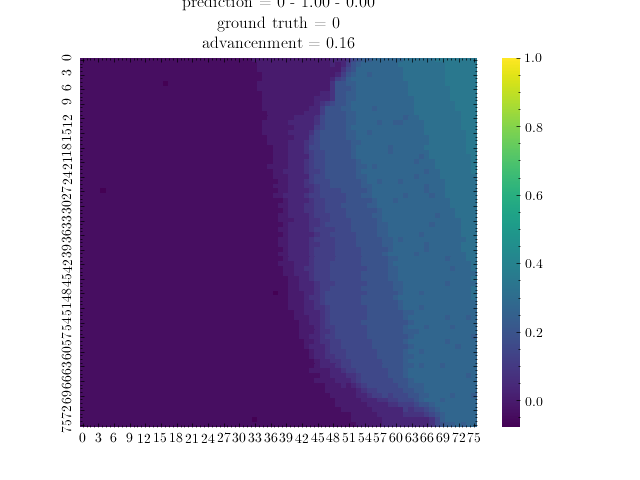

<IPython.core.display.Javascript object>


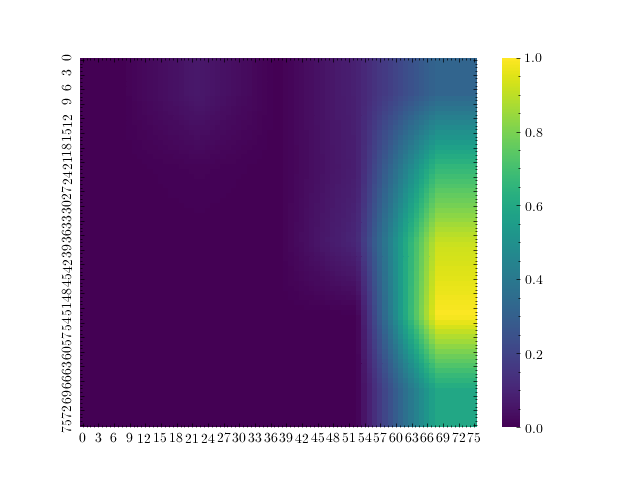

<IPython.core.display.Javascript object>


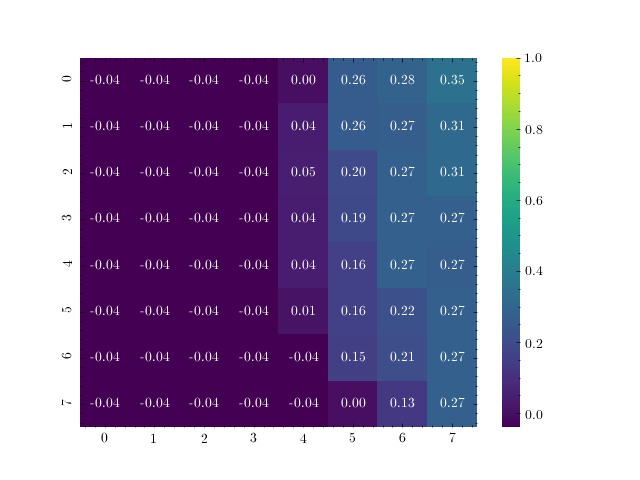

<IPython.core.display.Javascript object>


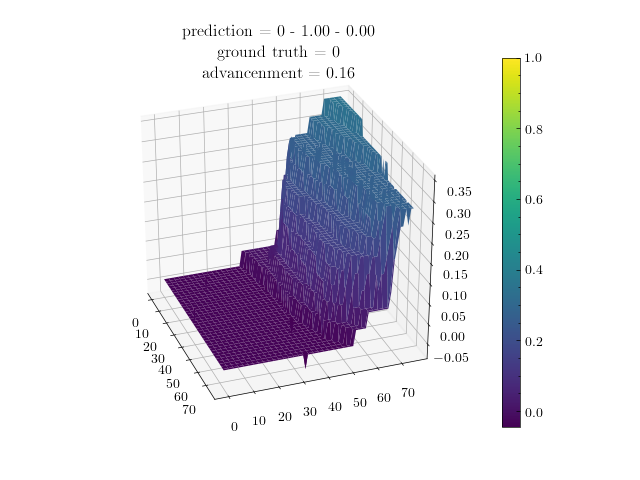

In [86]:
idx = 2


answers[idx].plot2d()
answers[idx].grad_cam(module, device).plot2d()
answers[idx].heatmap((8,8)).plot2d()
_ = answers[idx].plot3d()[0]
# answers[idx].add_advancement_using_simulator(3, 100).plot2d()

In [30]:
??ax.view_init

In [10]:
Patch.plot_all_2d(answers)

NameError: name 'answer' is not defined